## Time Averaged Radial Diffusion Coefficients

In [ ]:
import nugridpy.mesa as ms
import nugridpy.astronomy as ast
import sys
sys.path.insert(0, '/user/jericho/PyPPM')
%matplotlib nbagg
import ppm as ppm
import nugridpy.utils as utils
import matplotlib.pyplot as pl
import numpy as np

### plot various diffusion profiles for the D2 run

<IPython.core.display.Javascript object>


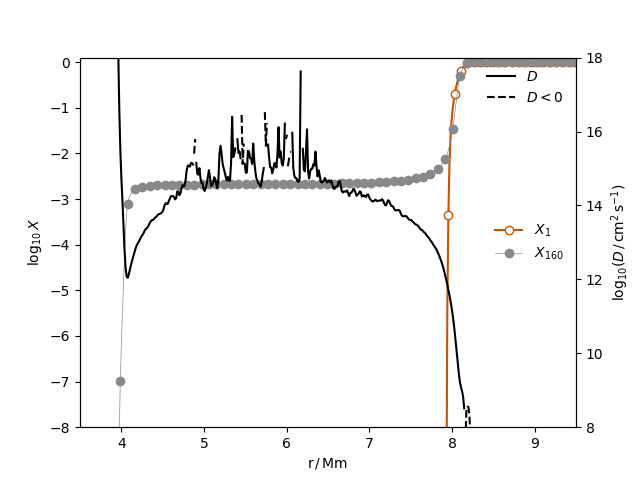

<IPython.core.display.Javascript object>


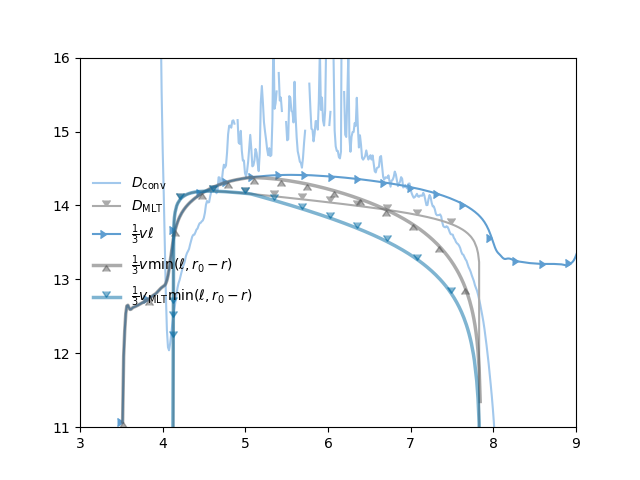

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


1386 in profiles.index file ...
Found and load nearest profile for cycle 28900
reading /data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02//LOGS/log593.data ...
 reading ...100% 

Closing profile tool ...


<IPython.core.display.Javascript object>


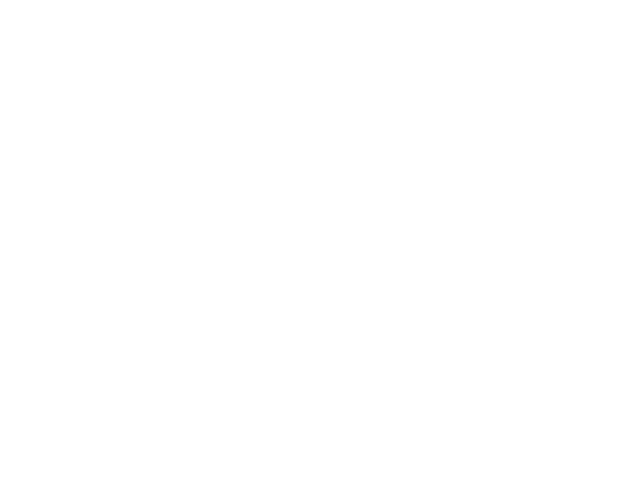

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in log10


(11, 16)

In [13]:
data_dir = '/data/ppm_rpod2/YProfiles/O-shell-M25/'
run = 'D2'
cb = utils.colourblind
ls = utils.linestyle
model = 28900
dir  = '/data/ppm_rpod2/Stellar_models/O-shell-M25/M25Z0.02/'
yy = 0
rtop = 7.8489
markevery = 25
YY = ppm.yprofile(data_dir+run)

[rrc, DDc, r0c, rc] = YY.Dsolvedown(1,160, fluid = 'FV H+He', tauconv = 2.*460.,
                                     returnY = True, newton = True, smooth = False)
fig = pl.figure(21)
pl.plot(rrc,np.log10(DDc),color = cb(yy),markevery=markevery,\
        label='$D_{\\rm conv}$')
yy += 1

rrf2, DDf2 = YY.Dov2(7.8282,10.**12.27,0.21,0.055) # r0, D0, f1, f2
yy += 1

p=ms.mesa_profile(dir+'/LOGS',model)
rm = p.get('radius') * ast.rsun_cm / 1.e8
idx = np.abs(rm-rtop).argmin()
rm = rm[idx:]
Dm = p.get('log_mlt_D_mix')
Dm = Dm[idx:]
pl.plot(rm,Dm,color = cb(yy),marker = ls(yy)[1] ,markevery=markevery,\
     label='$D_{\\rm MLT}$')
yy +=1

r = YY.get('Y',fname=1,resolution='l')[::-1]
vav = YY.vaverage('vY')[::-1] # cm / s

fig = pl.gcf()
pl.close(fig)
P = YY.get('P',fname=1)[::-1] * 1.e19 # barye, centre to surface
Hp = - P[1:] * np.diff(r) * 1.e8 / np.diff(P)
Hp = np.insert(Hp,0,0)
alpha=1.6
Dav = (1./3.) * vav * alpha * Hp
pl.plot(r,np.log10(Dav),color = cb(yy),marker = ls(yy)[1], markevery=markevery,\
     label='$\\frac{1}{3}v\ell$')
yy +=1

Dav2 = (1./3.) * vav * np.minimum(alpha * Hp,rtop*1.e8-r*1.e8)
pl.plot(r,np.log10(Dav2),color = cb(yy),marker = ls(yy)[1],markevery=markevery,linewidth=2.5,alpha=0.5,\
     label='$\\frac{1}{3}v{\\rm min}(\ell,r_0-r)$')
yy +=1

v_mlt = 10.**p.get('log_conv_vel')[idx:]
Hpmes = p.get('pressure_scale_height')[idx:]*ast.rsun_cm
Davmes = (1./3.) * v_mlt * np.minimum(alpha * Hpmes,rtop*1.e8-rm*1.e8)
pl.plot(rm,np.log10(Davmes),color = cb(yy),marker = ls(yy)[1],markevery=markevery,linewidth=2.5,alpha=0.5,\
     label='$\\frac{1}{3}v_{\\rm MLT}{\\rm min}(\ell,r_0-r)$')
pl.legend(loc='center left',numpoints=1).draw_frame(False)
pl.xlim(3,9)
pl.ylim(11,16)